In [1]:
import pantarei as rei
import numpy as np
import matplotlib.pyplot as plt
from src.simulation_module import initial_parameters, simulation, plot_val_over_NMC, visualize_3dmol
scheduler = rei.scheduler.ThreadScheduler(backend='process')

# PARAMETERS SETUP
Find values for the radii, volume and number of particles to have the wanted packing fraction value  
Here are just some temporary tries and possible values, the real parameters for simulations are in the cell after, they will be cleared once good parameters are found

In [2]:
def pack_frac(r,N,V):
    # if (np.pi*sigma**3*N/6/V) < 1: return np.pi*sigma**3*N/6/V
    if (4/3*np.pi*r**3*N/V) < 1: return 4/3*np.pi*r**3*N/V

#0.14 0.044
q = 0.05
r_coll = 1.1
r_part = r_coll*q
V = 10
N1 = 2
N2 = 5000

#0.23 0.0805
q = 0.1
r_coll = 1.3
r_coll = 1.
r_coll = 0.7
r_part = r_coll*q
V = 10
N1 = 2
N2 = 700
N2 = 3000

# 0.23 0.18
q = 0.2
r_coll = 0.5
r_coll = 0.35
r_coll = 0.6
r_coll = 2.1
r_part = r_coll*q
box = 2.6
box = 7
V = box**3
N1 = 2
N2 = 300
N2 = 600
N2 = 750
N2 = 500
# N2 = 5000

eta1 = pack_frac(r_coll,N1,V)
eta2 = pack_frac(r_part,N2,V)

print(eta1,eta2)

0.22619467105846514 0.45238934211693027


Set up parameters for the simulation:

In [3]:
###############
r_coll = 0.6

n_part = 500
steps = 1e5

n_part = 10000
steps = 4e4

###############
r_coll = 2.1
n_part = 500

steps = 1e5
steps = 5e4
steps = 5e5
steps = 1e6

###############
# r_coll = 1.8
# n_part = 800

# steps = 5e5
# steps = 2e6


##########################
q = 0.2                 ##
r_part = r_coll*q       ##
box = 7                 ##
V = box**3              ##
n_coll = 2              ##
##########################



packing_fract_coll = pack_frac(r_coll,n_coll,V)
packing_fract_part = pack_frac(r_part,n_part,V)
rho_num = (n_coll+n_part)/V
print(f"Packing fraction colloids:  {packing_fract_coll:.2}")
print(f"Packing fraction particles: {packing_fract_part:.2}")
print(f"Density of number:          {rho_num:.3}")

Packing fraction colloids:  0.23
Packing fraction particles: 0.45
Density of number:          1.46


# SIMULATION
Begin 4 simulations in parallel to speed up the data acquization

In [ ]:
clear_first = False
clear_first = True              ## Toggle ##

task = rei.Task(simulation,clear_first=clear_first)
job = rei.Thread(task, scheduler=scheduler)

# job = simulation

# seeds = [1,2,3,4] + [5,6,7,8]   # mc_param_coll = 0.1*box[0]; mc_param_part = 0.4*box[0]  --  steps=5e5
# seeds = [10,11,12,13]           # mc_param_coll = 2*r_part; mc_param_part = r_coll  --  steps=1e6
# seeds = [1,2,3,4]               # change r_coll 2.1->1.8, n_part 500->800 -- steps=5e5
seeds = [5,6,7,8]               # change r_coll 2.1->1.8, n_part 500->800 -- steps=2e6 (4h)

for seed in seeds:
    job(steps=steps,r_coll=r_coll,r_part=r_part,n_coll=n_coll,n_part=n_part,box=box,seed=seed)


In [ ]:
# import pantarei as rei
rei.report() # why do all job fail? should I reinstall the package? or maybe clear the "simulation" folder?

Now that the simulation is done, we can pick up the data  
Let's also visualize the last configuration

The first cell uses the finished pantarei jobs (but there must be an error somewhere), the second one uses the Trajectory class where the data is written to file step by step.  
This is much slower cause is has to read every file step by step (for now) but there are no errors, though you need to know the folder name or replicate the same simulation parameters (_!!put also clear_first=False otherwise you'd loose all data!!_)

In [ ]:
# task = rei.Task(simulation,clear_first=False)
# job = rei.Thread(task, scheduler=scheduler)
# trajectory = []
# # seeds = [0,1,2,3]
# # seeds += [1,2,3,4]
# # seeds = [0,1,2,3,4,5]
# # seeds = [1,2,3,4,5,6,7,8]
# for seed in seeds:
#     data=job(steps=steps,r_coll=r_coll,r_part=r_part,n_coll=n_coll,n_part=n_part,box=box,seed=seed)
#     trajectory += data['trajectory']

# packing_fract_coll = data['packing_fract_coll']
# packing_fract_part = data['packing_fract_part']
# accept_ratio_coll  = data['accept_ratio_coll']
# print(f"packing fract coll: {packing_fract_coll:.3}, " + 
#       f"packing fract part: {packing_fract_part:.3}, "+ 
#       f"accept ratio coll: {accept_ratio_coll:.2}")

# radii = [r_coll]*n_coll + [r_part]*n_part
# colors = ['white']*n_coll + ['blue']*n_part
# # visualize_3dmol(trajectory[-1].T,data['box'],radii=radii,colors=colors)

In [4]:
# seeds = [1,2,3,4] + [5,6,7,8] # mc_param_coll = 0.1*box[0]; mc_param_part = 0.4*box[0]  --  
# steps=5e5
# trajectory_directories = ['trajectories/9b7bd4165fe9651e98a9b3fe94bd4511', 'trajectories/3f97da09a87e3cdaf95a666d1c90923d', 'trajectories/2eb962a612606a3fdb39b4851725d921', 'trajectories/7a17cc79b93629e3b4569e2d8ba97429']
# trajectory_directories += ['trajectories/3c95b1ede96d688e2dffdc249765e39f','trajectories/9cad1caeede266dfc3758294bbdf757c','trajectories/72a5148a349d504fb5846a7e578aa3c4','trajectories/b1514ceb0fe69c5a8400f5ef838c1b2b']

# seeds = [10,11,12,13]        # mc_param_coll = 2*r_part; mc_param_part = r_coll  --  
steps=1e6
trajectory_directories = ['trajectories/5799930d9390d8f7e2aa512273c4a261','trajectories/0ce520f7594f359f76bea65ab513a468','trajectories/1da2d106c81dfc766f003c18fdcfbe9b','trajectories/a7c0669d8d9ce4bb8ae3f2b03eac710f']

# seeds = [1,2,3,4] # change r_coll 2.1->1.8, n_part 500->800 -- 
# steps=5e5
# trajectory_directories = ['trajectories/c1d0abfcbdfe79beae0d3dd3a41a2004','trajectories/afd54c11e4c6888c0bcb30e1e682d57a','trajectories/d5d37e6eef1d26f41e775bc650b1c042','trajectories/99b38c45170b2ab55ddfbaad9c374bb5']

# seeds = [5,6,7,8] # change r_coll 2.1->1.8, n_part 500->800 -- 
# steps=2e6 #(4h)
# trajectory_directories = ['trajectories/c3e4e86433c26d98b756ee27d8f95abe','trajectories/f8166d0a31dde9c0e747fe011e284a4e','trajectories/43b58866aedb954eca4b5a876af6fb23','trajectories/b3ffbfaba970f6015a2d7ca5b7740a3b']


blocks = [k*steps for k in range(len(trajectory_directories))]

from src.trajectory import Trajectory
trajectory = []
for trajectory_dir in trajectory_directories:
    with Trajectory(trajectory_dir=trajectory_dir,mode='r') as traj:
        for positions in traj:
            trajectory.append(positions)
    print(trajectory_dir + ' - DONE')


# radii = [r_coll]*n_coll + [r_part]*n_part
# colors = ['white']*n_coll + ['blue']*n_part
# visualize_3dmol(trajectory[-1].T,np.ones(3)*box,radii=radii,colors=colors)

trajectories/5799930d9390d8f7e2aa512273c4a261 - DONE
trajectories/0ce520f7594f359f76bea65ab513a468 - DONE
trajectories/1da2d106c81dfc766f003c18fdcfbe9b - DONE
trajectories/a7c0669d8d9ce4bb8ae3f2b03eac710f - DONE


# ANALYSIS

Let's now compute the radial distribution function $g(r)\propto p(r)/4\pi r^2 \Delta r$ and the effective potential $V'(r)=-kT\cdot\log(g(r))$

Three examples will follow (the last one is the most meaningful since has the greater amount of data):  
All of them have a packing fraction value of the smaller spheres, around 0.46, and proportion between the radii of the particles and colloids, q=0.2.  
But then differ from number of montecarlo steps, montecarlo parameter and radius of the colloids (so also of the smaller particles)
- in the first simulation, the montecarlo parameter is propotional to the box: mc_param_coll = 0.1\*box; mc_param_part = 0.4\*box; steps=8*5e5
- in the second simulation, the montecarlo parameter for the colloid is equal to the diameter of the small particles while : mc_param_coll = 2\*r_part; mc_param_part = r_coll  --  steps=4\*1e6
- in the third simulation, the bigger colloid's radius is reduced, so it is the smaller particle's and the number of particles to preserve q=0.2 and the packing fraction of particles=0.46: r_coll 2.1->1.8; n_part 500->800; steps=4*2e6

Since were done multiple simulations in parallel, the dashed vertical lines highlight were each simulation begins


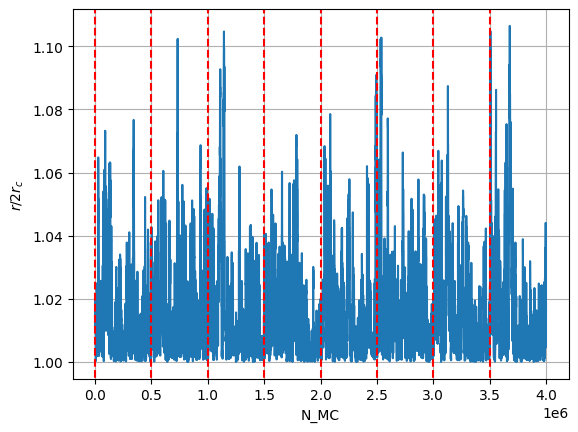

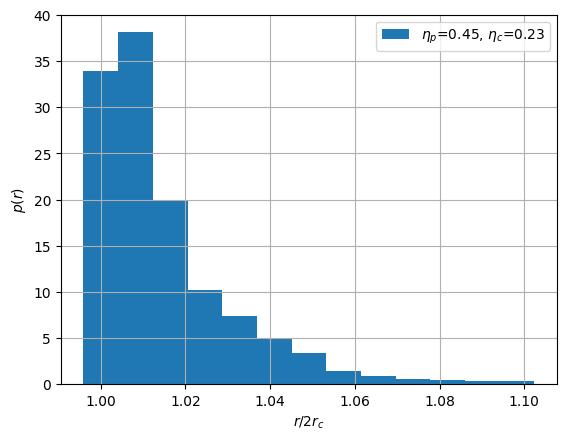

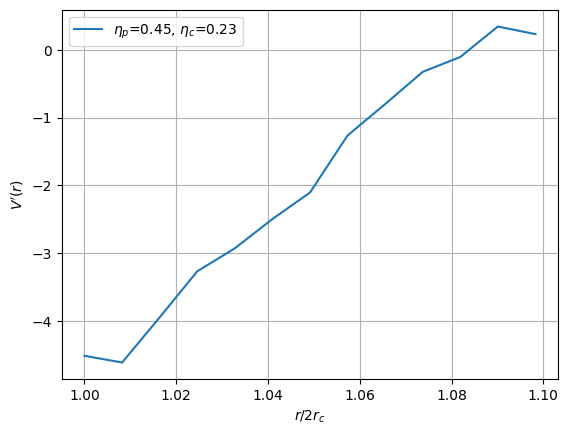

In [7]:
dist_colloids = []

for pos in trajectory:
    rij = pos[:,1] - pos[:,0]
    rij -= box * np.round(rij / box) # minimal image convention
    dist = np.linalg.norm(rij)
    dist_colloids.append(dist/2/r_coll)

plot_val_over_NMC(val=dist_colloids,x_multipl=100,blocks=blocks,ylabel=f"$r/2r_c$")

plt.figure()
bins = 13
d_bin = (max(dist_colloids) - min(dist_colloids))/bins
x_bins = [min(dist_colloids)+(k)*d_bin for k in range(bins)]
bins = [min(dist_colloids)+(k-0.5)*d_bin for k in range(bins+1)]
label = f"$\eta_p$={packing_fract_part:.2}, $\eta_c$={packing_fract_coll:.2}"
pdr, dr, ax = plt.hist(dist_colloids,bins,density=True,label=label)
plt.grid()
plt.legend()
plt.ylabel(f"$p(r)$")
plt.xlabel(f"$r/2r_c$")

# g(r) = p(r) / (4 pi r^2 dr)
gdr = [pdr[i]/(x_bins[i]**2 *4*np.pi*d_bin) for i in range(len(pdr))]
gdr /= np.mean(gdr[len(gdr)//4*3:]) # make the last points to be around 1

Ueff = -np.log(gdr)
plt.figure()
plt.plot(x_bins,Ueff,label=label)
plt.grid()
plt.legend()
plt.ylabel(f"$V'(r)$")
plt.xlabel(f"$r/2r_c$")
plt.show()

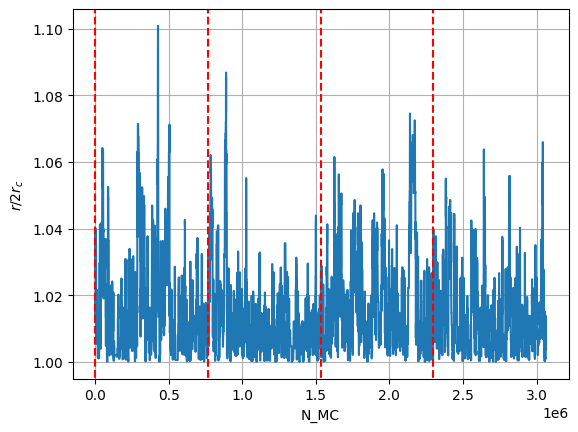

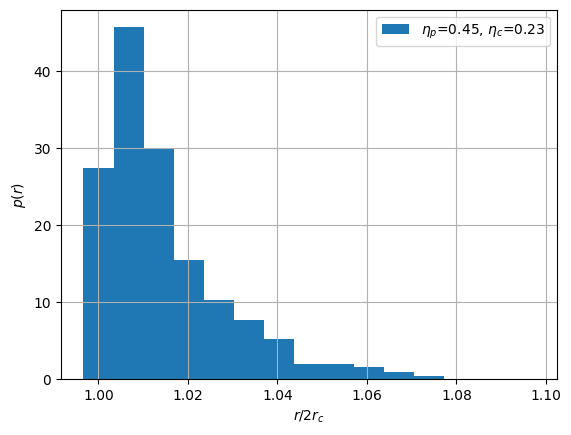

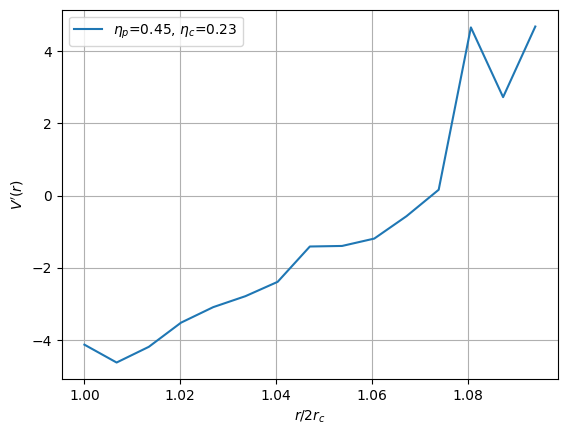

In [7]:
dist_colloids = []

for pos in trajectory:
    rij = pos[:,1] - pos[:,0]
    rij -= box * np.round(rij / box) # minimal image convention
    dist = np.linalg.norm(rij)
    dist_colloids.append(dist/2/r_coll)

blocks = [k*len(dist_colloids)*100/4 for k in range(4)]
plot_val_over_NMC(val=dist_colloids,x_multipl=100,blocks=blocks,ylabel=f"$r/2r_c$")

plt.figure()
bins = 15
d_bin = (max(dist_colloids) - min(dist_colloids))/bins
x_bins = [min(dist_colloids)+(k)*d_bin for k in range(bins)]
bins = [min(dist_colloids)+(k-0.5)*d_bin for k in range(bins+1)]
label = f"$\eta_p$={packing_fract_part:.2}, $\eta_c$={packing_fract_coll:.2}"
pdr, dr, ax = plt.hist(dist_colloids,bins,density=True,label=label)
plt.grid()
plt.legend()
plt.ylabel(f"$p(r)$")
plt.xlabel(f"$r/2r_c$")

# g(r) = p(r) / (4 pi r^2 dr)
gdr = [pdr[i]/(x_bins[i]**2 *4*np.pi*d_bin) for i in range(len(pdr))]
gdr /= np.mean(gdr[len(gdr)//4*3:]) # make the last points to be around 1

Ueff = -np.log(gdr)
plt.figure()
plt.plot(x_bins,Ueff,label=label)
plt.grid()
plt.legend()
plt.ylabel(f"$V'(r)$")
plt.xlabel(f"$r/2r_c$")
plt.show()

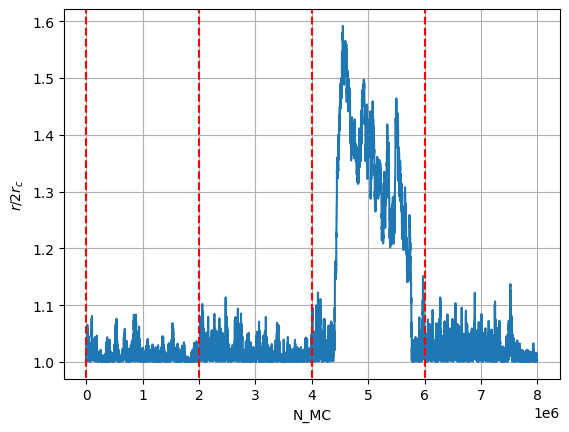

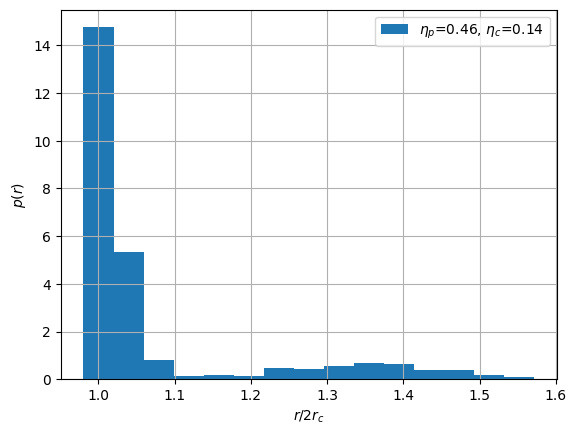

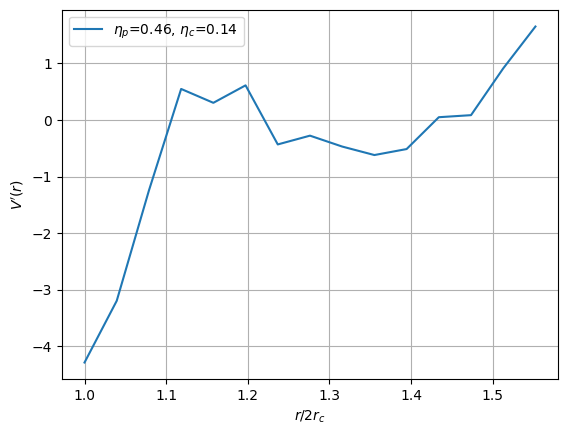

In [75]:
dist_colloids = []

for pos in trajectory:
    rij = pos[:,1] - pos[:,0]
    rij -= box * np.round(rij / box) # minimal image convention
    dist = np.linalg.norm(rij)
    dist_colloids.append(dist/2/r_coll)

plot_val_over_NMC(val=dist_colloids,x_multipl=100,blocks=blocks,ylabel=f"$r/2r_c$")

plt.figure()
bins = 15
d_bin = (max(dist_colloids) - min(dist_colloids))/bins
x_bins = [min(dist_colloids)+(k)*d_bin for k in range(bins)]
bins = [min(dist_colloids)+(k-0.5)*d_bin for k in range(bins+1)]
label = f"$\eta_p$={packing_fract_part:.2}, $\eta_c$={packing_fract_coll:.2}"
pdr, dr, ax = plt.hist(dist_colloids,bins,density=True,label=label)
plt.grid()
plt.legend()
plt.ylabel(f"$p(r)$")
plt.xlabel(f"$r/2r_c$")

# g(r) = p(r) / (4 pi r^2 dr)
gdr = [pdr[i]/(x_bins[i]**2 *4*np.pi*d_bin) for i in range(len(pdr))]
gdr /= np.mean(gdr[len(gdr)//4*3:]) # make the last points to be around 1

Ueff = -np.log(gdr)
plt.figure()
plt.plot(x_bins,Ueff,label=label)
plt.grid()
plt.legend()
plt.ylabel(f"$V'(r)$")
plt.xlabel(f"$r/2r_c$")
plt.show()